In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
num =1# number of runs

In [ ]:
# import Packages

import pickle
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import itertools
from pylab import rcParams


In [ ]:
#function to read files present in the Python version of the dataset
def unpickle(file):
    with open(file, 'rb') as fo:
        myDict = pickle.load(fo, encoding='latin1')
    return myDict

trainData = unpickle('/content/drive/MyDrive/Colab Notebooks/cifar-100-python/cifar 100/train')
metaData = unpickle('/content/drive/MyDrive/Colab Notebooks/cifar-100-python/cifar 100/meta')
testData = unpickle('/content/drive/MyDrive/Colab Notebooks/cifar-100-python/cifar 100/test')

In [ ]:
#storing fine labels along with its number code in a dataframe
subCategory = pd.DataFrame(metaData['fine_label_names'], columns=['Class'])
print(subCategory)

            Class
0           apple
1   aquarium_fish
2            baby
3            bear
4          beaver
..            ...
95          whale
96    willow_tree
97           wolf
98          woman
99           worm

[100 rows x 1 columns]


In [ ]:
X_train = trainData['data']
X_train

array([[255, 255, 255, ...,  10,  59,  79],
       [255, 253, 253, ..., 253, 253, 255],
       [250, 248, 247, ..., 194, 207, 228],
       ...,
       [248, 240, 236, ..., 180, 174, 205],
       [156, 151, 151, ..., 114, 107, 126],
       [ 31,  30,  31, ...,  72,  69,  67]], dtype=uint8)

In [ ]:
X_train = X_train.reshape(len(X_train),3,32,32).transpose(0,2,3,1)
X_test = testData['data']
X_test = X_test.reshape(len(X_test),3,32,32).transpose(0,2,3,1)
y_train = trainData['fine_labels']
y_test = testData['fine_labels']

Image number selected : 41318
Shape of image : (32, 32, 3)
Image category number: 10
Image subcategory number: 10
Image subcategory name: Bowl


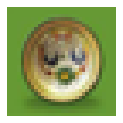

In [ ]:

rcParams['figure.figsize'] = 2,2

imageId = np.random.randint(0, len(X_train))
plt.imshow(X_train[imageId])
plt.axis('off')
print("Image number selected : {}".format(imageId))
print("Shape of image : {}".format(X_train[imageId].shape))
print("Image category number: {}".format(trainData['fine_labels'][imageId]))


print("Image subcategory number: {}".format(trainData['fine_labels'][imageId]))
print("Image subcategory name: {}".format(subCategory.iloc[trainData['fine_labels'][imageId]][0].capitalize()))

comment: We can see from the visualization that the quality of images is low and the position of the object in the image varies a lot. It would be difficult to train a model to recognize and classify such images¶

In [ ]:
yytrain = tf.keras.utils.to_categorical(y_train, 100)
yytest = tf.keras.utils.to_categorical(y_test, 100)
print(yytrain.shape)
print(yytest.shape)
yytrain[0]

(50000, 100)
(10000, 100)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [ ]:
xxtrain = X_train/255.0
xxtest = X_test/255.0
print(xxtrain.shape)
print(xxtest.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:


ratio=0.8 
lenData=len(xxtrain)

n_sample = round(lenData * ratio) 
   
imglist= range(lenData)   
index = np.random.choice(lenData, n_sample,replace=True) 
oobindex=[I for I in imglist if I not in index] 

xtrainsample=xxtrain[index,:]
ytrainsample=yytrain[index,:]
xvalsample=xxtrain[oobindex,:] 
yvalsample=yytrain[oobindex,:]

In [ ]:
batch_size = 64
num_classes = 100
epochs = 50

Individual Net : 1
Epoch 1/50
625/625 [==============================] - 16s 24ms/step - loss: 4.4021 - acc: 0.0362 - val_loss: 4.1807 - val_acc: 0.0695
Epoch 2/50
625/625 [==============================] - 15s 23ms/step - loss: 4.0707 - acc: 0.0796 - val_loss: 3.8893 - val_acc: 0.1175
Epoch 3/50
625/625 [==============================] - 15s 23ms/step - loss: 3.8672 - acc: 0.1161 - val_loss: 3.7472 - val_acc: 0.1396
Epoch 4/50
625/625 [==============================] - 15s 23ms/step - loss: 3.7434 - acc: 0.1359 - val_loss: 3.6324 - val_acc: 0.1629
Epoch 5/50
625/625 [==============================] - 15s 23ms/step - loss: 3.6417 - acc: 0.1535 - val_loss: 3.5294 - val_acc: 0.1815
Epoch 6/50
625/625 [==============================] - 15s 23ms/step - loss: 3.5542 - acc: 0.1669 - val_loss: 3.4594 - val_acc: 0.1954
Epoch 7/50
625/625 [==============================] - 15s 23ms/step - loss: 3.4771 - acc: 0.1787 - val_loss: 3.3919 - val_acc: 0.2049
Epoch 8/50
625/625 [=======================

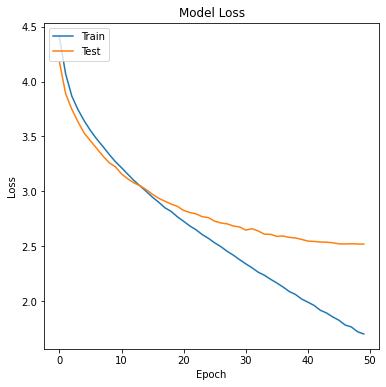

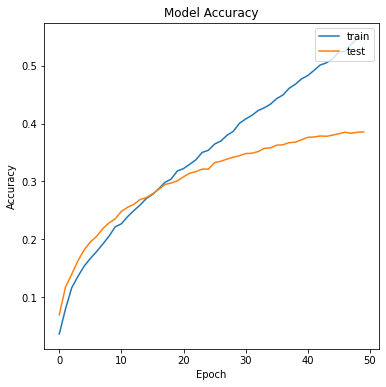

Individual Net : 2
Epoch 1/50
625/625 [==============================] - 16s 24ms/step - loss: 4.4239 - acc: 0.0323 - val_loss: 4.2242 - val_acc: 0.0500
Epoch 2/50
625/625 [==============================] - 15s 23ms/step - loss: 4.1210 - acc: 0.0732 - val_loss: 3.9449 - val_acc: 0.1007
Epoch 3/50
625/625 [==============================] - 15s 23ms/step - loss: 3.8972 - acc: 0.1099 - val_loss: 3.7665 - val_acc: 0.1417
Epoch 4/50
625/625 [==============================] - 15s 23ms/step - loss: 3.7681 - acc: 0.1292 - val_loss: 3.6673 - val_acc: 0.1592
Epoch 5/50
625/625 [==============================] - 15s 23ms/step - loss: 3.6728 - acc: 0.1483 - val_loss: 3.5805 - val_acc: 0.1704
Epoch 6/50
625/625 [==============================] - 15s 23ms/step - loss: 3.5862 - acc: 0.1639 - val_loss: 3.5122 - val_acc: 0.1845
Epoch 7/50
625/625 [==============================] - 15s 23ms/step - loss: 3.5092 - acc: 0.1769 - val_loss: 3.4264 - val_acc: 0.2003
Epoch 8/50
625/625 [=======================

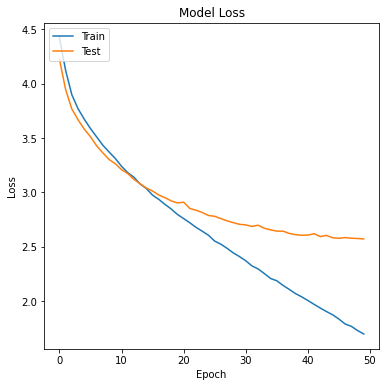

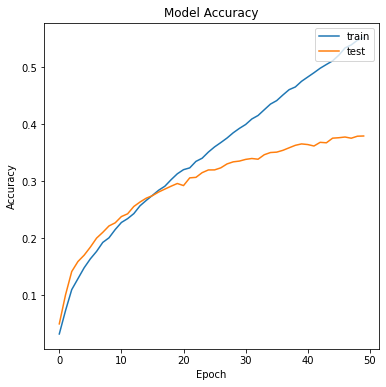

Individual Net : 3
Epoch 1/50
625/625 [==============================] - 16s 24ms/step - loss: 4.4346 - acc: 0.0336 - val_loss: 4.2297 - val_acc: 0.0593
Epoch 2/50
625/625 [==============================] - 15s 24ms/step - loss: 4.1072 - acc: 0.0811 - val_loss: 3.9136 - val_acc: 0.1172
Epoch 3/50
625/625 [==============================] - 15s 24ms/step - loss: 3.8920 - acc: 0.1144 - val_loss: 3.7603 - val_acc: 0.1382
Epoch 4/50
625/625 [==============================] - 15s 24ms/step - loss: 3.7630 - acc: 0.1337 - val_loss: 3.6483 - val_acc: 0.1599
Epoch 5/50
625/625 [==============================] - 15s 23ms/step - loss: 3.6628 - acc: 0.1507 - val_loss: 3.5675 - val_acc: 0.1744
Epoch 6/50
625/625 [==============================] - 15s 23ms/step - loss: 3.5723 - acc: 0.1652 - val_loss: 3.4727 - val_acc: 0.1909
Epoch 7/50
625/625 [==============================] - 15s 23ms/step - loss: 3.4871 - acc: 0.1798 - val_loss: 3.3965 - val_acc: 0.2059
Epoch 8/50
625/625 [=======================

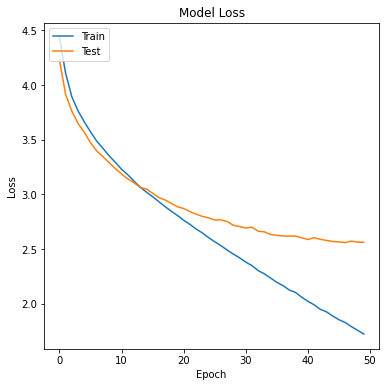

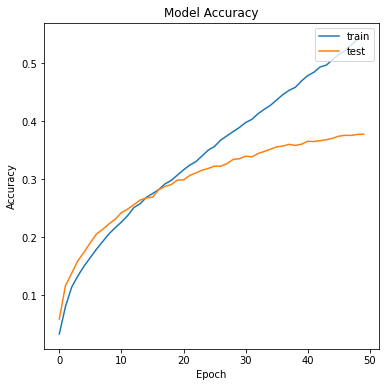

Individual Net : 4
Epoch 1/50
625/625 [==============================] - 16s 25ms/step - loss: 4.4305 - acc: 0.0319 - val_loss: 4.2372 - val_acc: 0.0528
Epoch 2/50
625/625 [==============================] - 15s 23ms/step - loss: 4.1384 - acc: 0.0733 - val_loss: 3.9558 - val_acc: 0.1077
Epoch 3/50
625/625 [==============================] - 15s 23ms/step - loss: 3.9060 - acc: 0.1096 - val_loss: 3.7746 - val_acc: 0.1390
Epoch 4/50
625/625 [==============================] - 15s 23ms/step - loss: 3.7754 - acc: 0.1320 - val_loss: 3.6928 - val_acc: 0.1460
Epoch 5/50
625/625 [==============================] - 15s 23ms/step - loss: 3.6772 - acc: 0.1477 - val_loss: 3.5688 - val_acc: 0.1787
Epoch 6/50
625/625 [==============================] - 15s 23ms/step - loss: 3.5947 - acc: 0.1626 - val_loss: 3.4906 - val_acc: 0.1886
Epoch 7/50
625/625 [==============================] - 15s 23ms/step - loss: 3.5171 - acc: 0.1759 - val_loss: 3.4344 - val_acc: 0.1961
Epoch 8/50
625/625 [=======================

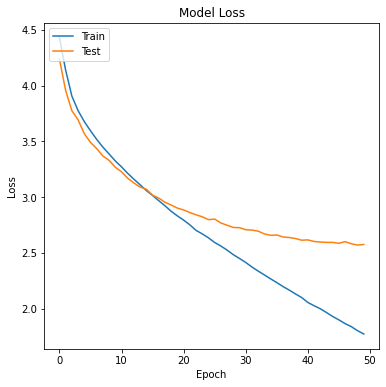

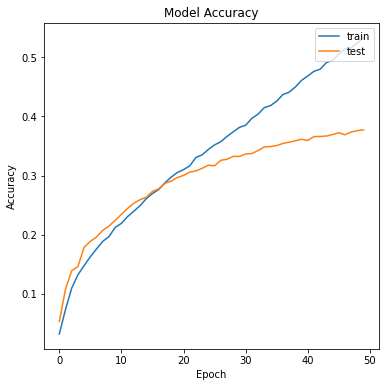

Individual Net : 5
Epoch 1/50
625/625 [==============================] - 16s 24ms/step - loss: 4.4072 - acc: 0.0339 - val_loss: 4.2335 - val_acc: 0.0573
Epoch 2/50
625/625 [==============================] - 15s 23ms/step - loss: 4.1246 - acc: 0.0726 - val_loss: 3.9165 - val_acc: 0.1174
Epoch 3/50
625/625 [==============================] - 15s 24ms/step - loss: 3.8885 - acc: 0.1110 - val_loss: 3.7548 - val_acc: 0.1416
Epoch 4/50
625/625 [==============================] - 15s 24ms/step - loss: 3.7560 - acc: 0.1344 - val_loss: 3.6484 - val_acc: 0.1640
Epoch 5/50
625/625 [==============================] - 15s 23ms/step - loss: 3.6597 - acc: 0.1488 - val_loss: 3.5573 - val_acc: 0.1781
Epoch 6/50
625/625 [==============================] - 15s 23ms/step - loss: 3.5747 - acc: 0.1642 - val_loss: 3.4840 - val_acc: 0.1911
Epoch 7/50
625/625 [==============================] - 15s 23ms/step - loss: 3.5015 - acc: 0.1778 - val_loss: 3.4217 - val_acc: 0.2040
Epoch 8/50
625/625 [=======================

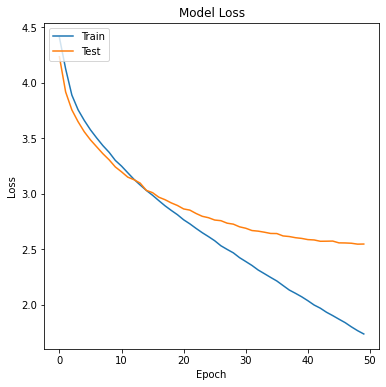

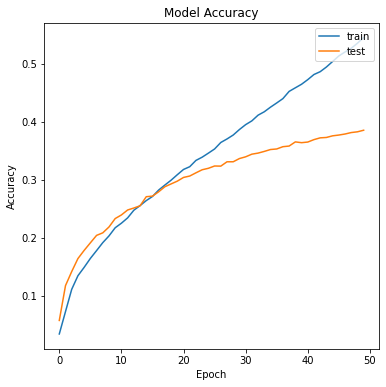

Individual Net : 6
Epoch 1/50
625/625 [==============================] - 16s 24ms/step - loss: 4.4189 - acc: 0.0314 - val_loss: 4.2382 - val_acc: 0.0584
Epoch 2/50
625/625 [==============================] - 15s 23ms/step - loss: 4.1243 - acc: 0.0755 - val_loss: 3.9287 - val_acc: 0.1079
Epoch 3/50
625/625 [==============================] - 15s 24ms/step - loss: 3.8985 - acc: 0.1115 - val_loss: 3.7646 - val_acc: 0.1417
Epoch 4/50
625/625 [==============================] - 15s 23ms/step - loss: 3.7776 - acc: 0.1298 - val_loss: 3.6564 - val_acc: 0.1605
Epoch 5/50
625/625 [==============================] - 15s 23ms/step - loss: 3.6724 - acc: 0.1485 - val_loss: 3.5742 - val_acc: 0.1730
Epoch 6/50
625/625 [==============================] - 15s 23ms/step - loss: 3.5924 - acc: 0.1640 - val_loss: 3.5159 - val_acc: 0.1863
Epoch 7/50
625/625 [==============================] - 15s 23ms/step - loss: 3.5136 - acc: 0.1741 - val_loss: 3.4309 - val_acc: 0.1996
Epoch 8/50
625/625 [=======================

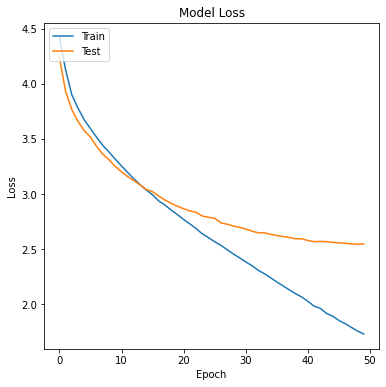

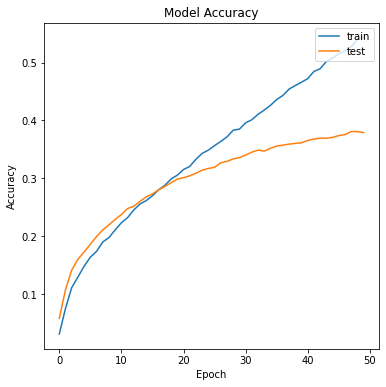

Individual Net : 7
Epoch 1/50
625/625 [==============================] - 16s 24ms/step - loss: 4.4355 - acc: 0.0316 - val_loss: 4.2352 - val_acc: 0.0584
Epoch 2/50
625/625 [==============================] - 15s 24ms/step - loss: 4.1273 - acc: 0.0764 - val_loss: 3.9398 - val_acc: 0.1033
Epoch 3/50
625/625 [==============================] - 15s 24ms/step - loss: 3.8990 - acc: 0.1119 - val_loss: 3.7774 - val_acc: 0.1375
Epoch 4/50
625/625 [==============================] - 15s 24ms/step - loss: 3.7747 - acc: 0.1316 - val_loss: 3.6741 - val_acc: 0.1559
Epoch 5/50
625/625 [==============================] - 15s 24ms/step - loss: 3.6775 - acc: 0.1488 - val_loss: 3.5801 - val_acc: 0.1760
Epoch 6/50
625/625 [==============================] - 15s 23ms/step - loss: 3.5899 - acc: 0.1661 - val_loss: 3.5000 - val_acc: 0.1895
Epoch 7/50
625/625 [==============================] - 15s 24ms/step - loss: 3.5124 - acc: 0.1770 - val_loss: 3.4262 - val_acc: 0.1968
Epoch 8/50
625/625 [=======================

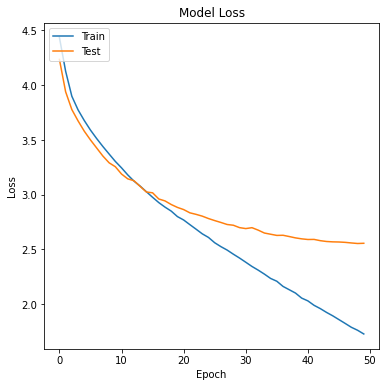

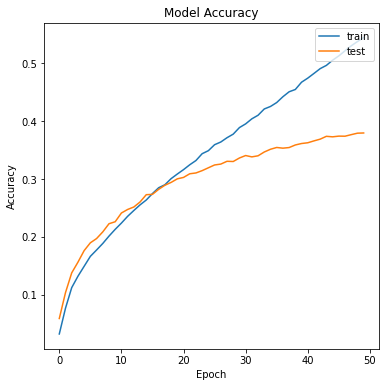

Individual Net : 8
Epoch 1/50
625/625 [==============================] - 16s 24ms/step - loss: 4.4207 - acc: 0.0319 - val_loss: 4.2357 - val_acc: 0.0619
Epoch 2/50
625/625 [==============================] - 15s 24ms/step - loss: 4.1278 - acc: 0.0737 - val_loss: 3.9274 - val_acc: 0.1188
Epoch 3/50
625/625 [==============================] - 15s 24ms/step - loss: 3.8971 - acc: 0.1092 - val_loss: 3.7693 - val_acc: 0.1386
Epoch 4/50
625/625 [==============================] - 15s 24ms/step - loss: 3.7794 - acc: 0.1287 - val_loss: 3.6580 - val_acc: 0.1592
Epoch 5/50
625/625 [==============================] - 15s 24ms/step - loss: 3.6778 - acc: 0.1463 - val_loss: 3.5718 - val_acc: 0.1758
Epoch 6/50
625/625 [==============================] - 15s 24ms/step - loss: 3.5916 - acc: 0.1616 - val_loss: 3.4916 - val_acc: 0.1891
Epoch 7/50
625/625 [==============================] - 15s 24ms/step - loss: 3.5216 - acc: 0.1735 - val_loss: 3.4269 - val_acc: 0.1968
Epoch 8/50
625/625 [=======================

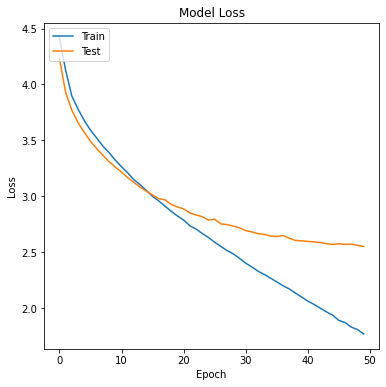

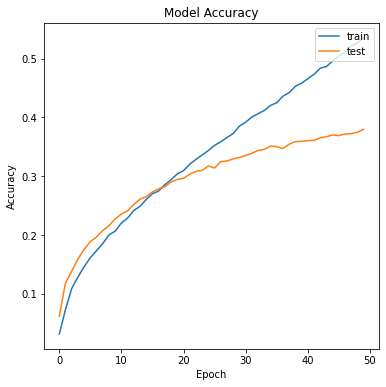

Individual Net : 9
Epoch 1/50
625/625 [==============================] - 16s 25ms/step - loss: 4.4275 - acc: 0.0316 - val_loss: 4.2395 - val_acc: 0.0543
Epoch 2/50
625/625 [==============================] - 15s 23ms/step - loss: 4.1494 - acc: 0.0715 - val_loss: 3.9643 - val_acc: 0.1074
Epoch 3/50
625/625 [==============================] - 15s 23ms/step - loss: 3.9124 - acc: 0.1116 - val_loss: 3.7834 - val_acc: 0.1338
Epoch 4/50
625/625 [==============================] - 15s 23ms/step - loss: 3.7778 - acc: 0.1334 - val_loss: 3.6759 - val_acc: 0.1530
Epoch 5/50
625/625 [==============================] - 15s 24ms/step - loss: 3.6698 - acc: 0.1482 - val_loss: 3.5655 - val_acc: 0.1736
Epoch 6/50
625/625 [==============================] - 15s 24ms/step - loss: 3.5806 - acc: 0.1653 - val_loss: 3.5107 - val_acc: 0.1844
Epoch 7/50
625/625 [==============================] - 15s 24ms/step - loss: 3.4995 - acc: 0.1800 - val_loss: 3.4043 - val_acc: 0.2042
Epoch 8/50
625/625 [=======================

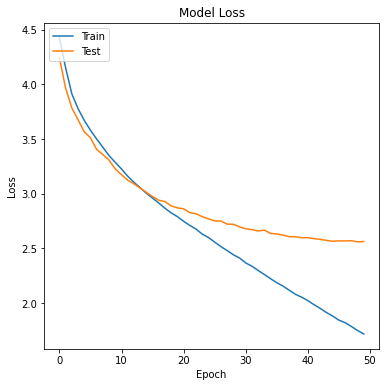

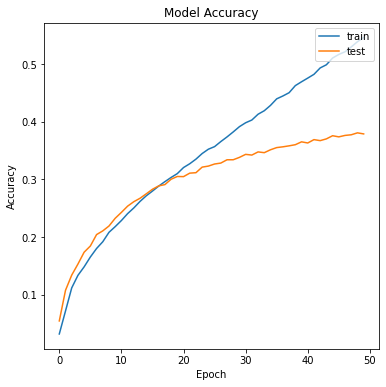

Individual Net : 10
Epoch 1/50
625/625 [==============================] - 16s 24ms/step - loss: 4.4113 - acc: 0.0347 - val_loss: 4.2158 - val_acc: 0.0716
Epoch 2/50
625/625 [==============================] - 15s 24ms/step - loss: 4.0853 - acc: 0.0817 - val_loss: 3.8869 - val_acc: 0.1221
Epoch 3/50
625/625 [==============================] - 15s 24ms/step - loss: 3.8741 - acc: 0.1132 - val_loss: 3.7413 - val_acc: 0.1450
Epoch 4/50
625/625 [==============================] - 15s 24ms/step - loss: 3.7551 - acc: 0.1361 - val_loss: 3.6349 - val_acc: 0.1634
Epoch 5/50
625/625 [==============================] - 15s 24ms/step - loss: 3.6473 - acc: 0.1498 - val_loss: 3.5353 - val_acc: 0.1802
Epoch 6/50
625/625 [==============================] - 15s 24ms/step - loss: 3.5613 - acc: 0.1658 - val_loss: 3.4681 - val_acc: 0.1906
Epoch 7/50
625/625 [==============================] - 15s 24ms/step - loss: 3.4846 - acc: 0.1802 - val_loss: 3.3892 - val_acc: 0.2065
Epoch 8/50
625/625 [======================

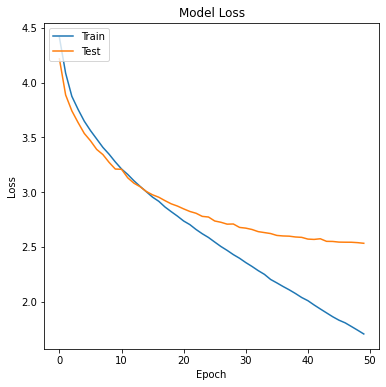

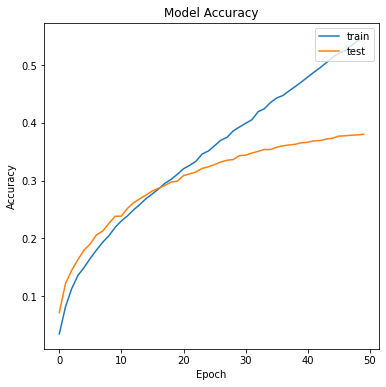

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
nets = 10
model = [0] *nets
for j in range(nets):
    model[j] = Sequential()
    model[j].add(Conv2D(128, (3, 3), padding='same', input_shape=(32, 32, 3), activation='elu')),
    model[j].add(Conv2D(128, (3, 3), activation='elu')),
    model[j].add(MaxPooling2D(pool_size=(2,2))),
    model[j].add(Dropout(0.1)),

    model[j].add(Conv2D(256, (3, 3), padding='same', activation='elu')),
    model[j].add(Conv2D(256, (3, 3), activation='elu')),
    model[j].add(MaxPooling2D(pool_size=(2,2))),
    model[j].add(Dropout(0.25)),

    model[j].add(Conv2D(512, (3, 3), padding='same', activation='elu')),
    model[j].add(Conv2D(512, (3, 3), activation='elu')),
    model[j].add(MaxPooling2D(pool_size=(2,2))),
    model[j].add(Dropout(0.25)),
    
    model[j].add(Flatten()),
    model[j].add(Dense(1024, activation='elu')),
    model[j].add(Dropout(0.25)),
    model[j].add(Dense(num_classes, activation='softmax'))

    model[j].compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00001, decay=1e-06),
            loss='categorical_crossentropy', metrics=['acc'])



for j in range(nets):
    print(f'Individual Net : {j+1}')
    history=model[j].fit(xtrainsample, ytrainsample, batch_size=batch_size,epochs=epochs, validation_data=(xvalsample, yvalsample))
    plt.figure(figsize=(6, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    plt.figure(figsize=(6, 6))
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()

    


In [ ]:
for j in range(nets):
    model[j].save('ensemble.h5')

In [ ]:
# Evaluate model using test dataset
from tensorflow.keras.models import load_model
for j in range(nets):
    test_loss, test_acc = model[j].evaluate(xxtest, yytest)

   

313/313 [==============================] - 2s 5ms/step - loss: 2.5147 - acc: 0.3838


In [ ]:
results = np.zeros (yytest.shape) 
for j in range(nets):
    results = results + model[j].predict(xxtest)
results = np.argmax(results,axis = 1)
y_true = np.argmax(yytest,axis=1)
temp=(y_true-results)
baggingCNN=(temp==0).sum()/yytest.shape[0]
print('\nThe accuracy using '+''+str(nets)+''+ ' classifiers is:', baggingCNN)




The accuracy using 10 classifiers is: 0.4131


Text(0.5, 1.0, '30')

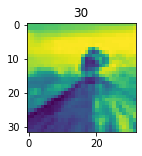

In [ ]:
plt.imshow(xxtest[0][:,:,0])
plt.title(results[0])